In [1]:
import warnings
warnings.filterwarnings('ignore')

from glob import glob
import pandas as pd
import numpy as np 
from tqdm import tqdm
import cv2

import os
import timm
import random

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torchvision.transforms as transforms
from sklearn.metrics import f1_score, accuracy_score
import time
import import_ipynb
#from data_undersampling import undersampling1
#from data_oversampling import *
from data_augmentation import *
device = torch.device('cuda')

importing Jupyter notebook from data_augmentation.ipynb


Counter({'hazelnut-good': 391, 'screw-good': 320, 'carpet-good': 280, 'pill-good': 267, 'grid-good': 264, 'wood-good': 247, 'leather-good': 245, 'zipper-good': 240, 'tile-good': 230, 'cable-good': 224, 'metal_nut-good': 220, 'capsule-good': 219, 'transistor-good': 213, 'bottle-good': 209, 'toothbrush-good': 60, 'toothbrush-defective': 15, 'pill-crack': 13, 'pill-color': 13, 'screw-scratch_neck': 13, 'metal_nut-bent': 13, 'metal_nut-scratch': 12, 'screw-thread_side': 12, 'pill-scratch': 12, 'screw-manipulated_front': 12, 'screw-thread_top': 12, 'capsule-crack': 12, 'metal_nut-flip': 12, 'screw-scratch_head': 12, 'capsule-scratch': 12, 'bottle-contamination': 11, 'capsule-poke': 11, 'metal_nut-color': 11, 'bottle-broken_small': 11, 'pill-contamination': 11, 'wood-scratch': 11, 'capsule-faulty_imprint': 11, 'capsule-squeeze': 10, 'bottle-broken_large': 10, 'leather-cut': 10, 'carpet-thread': 10, 'pill-faulty_imprint': 10, 'leather-glue': 10, 'carpet-color': 10, 'zipper-broken_teeth': 10, 

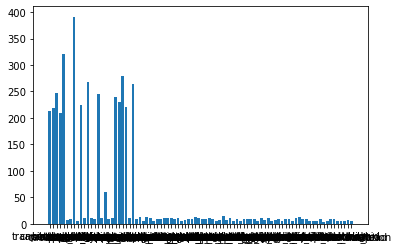

Counter({'cable-bent_wire': 172, 'capsule-squeeze': 172, 'zipper-fabric_border': 165, 'tile-crack': 164, 'carpet-metal_contamination': 162, 'transistor-bent_lead': 160, 'toothbrush-good': 159, 'leather-poke': 159, 'metal_nut-scratch': 155, 'cable-cut_outer_insulation': 154, 'carpet-color': 154, 'grid-broken': 154, 'tile-good': 153, 'metal_nut-flip': 153, 'bottle-good': 152, 'zipper-fabric_interior': 151, 'cable-cut_inner_insulation': 150, 'screw-thread_top': 148, 'cable-cable_swap': 148, 'pill-crack': 147, 'wood-combined': 147, 'cable-good': 146, 'transistor-cut_lead': 146, 'hazelnut-print': 145, 'capsule-scratch': 145, 'zipper-squeezed_teeth': 144, 'hazelnut-hole': 144, 'transistor-good': 143, 'leather-glue': 143, 'tile-gray_stroke': 143, 'transistor-damaged_case': 143, 'screw-thread_side': 142, 'zipper-broken_teeth': 142, 'pill-color': 142, 'screw-scratch_head': 141, 'zipper-split_teeth': 141, 'zipper-combined': 141, 'bottle-broken_small': 141, 'carpet-cut': 141, 'capsule-good': 140,

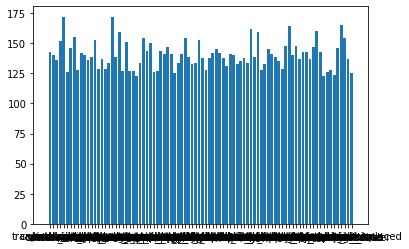

oversampling 해야 하는 개수:  [124, 130, 127, -57, 165, 142, 132, 143, 149, -78, 122, 122, 135, 115, 128, -79, 124, 133, 162, 144, 132, -151, 119, 153, 130, 127, 148, 131, -127, 122, 123, 131, 125, -265, 135, 136, 123, 124, 117, 133, -116, 150, 125, 115, 141, -86, 143, 129, 129, 120, 134, 129, -139, 129, 123, -193, 124, 129, 110, 130, 136, 155, 118, -77, 135, 124, 129, 124, 99, 155, 141, 138, -70, 120, 133, 141, -111, 119, 118, 114, 132, 133, 156, 143, -101, 130, 132, 136]
total num :  88


1 : bottle-broken_large label's deleting process: 100%|████████████████████████████████| 5/5 [00:00<00:00, 5159.05it/s]
1 : bottle-broken_large label's augmentation process: 100%|██████████████████████████| 129/129 [00:06<00:00, 20.43it/s]
2 : bottle-broken_small label's deleting process: 100%|████████████████████████████████| 7/7 [00:00<00:00, 3231.71it/s]
2 : bottle-broken_small label's augmentation process: 100%|██████████████████████████| 137/137 [00:06<00:00, 20.15it/s]
3 : bottle-contamination label's deleting process: 100%|███████████████████████████████| 7/7 [00:00<00:00, 7022.27it/s]
3 : bottle-contamination label's augmentation process: 100%|█████████████████████████| 134/134 [00:06<00:00, 19.39it/s]
6 : cable-cable_swap label's deleting process: 100%|███████████████████████████████████| 2/2 [00:00<00:00, 2007.32it/s]
6 : cable-cable_swap label's augmentation process: 100%|█████████████████████████████| 144/144 [00:15<00:00,  9.27it/s]
7 : cable-combined label's augmentation 

69 : toothbrush-good label's deleting process: 100%|█████████████████████████████████| 38/38 [00:00<00:00, 4241.97it/s]
69 : toothbrush-good label's augmentation process: 100%|█████████████████████████████| 137/137 [00:11<00:00, 11.65it/s]
70 : transistor-bent_lead label's deleting process: 100%|██████████████████████████████| 2/2 [00:00<00:00, 2003.97it/s]
70 : transistor-bent_lead label's augmentation process: 100%|████████████████████████| 157/157 [00:15<00:00, 10.34it/s]
71 : transistor-cut_lead label's deleting process: 100%|███████████████████████████████| 4/4 [00:00<00:00, 4011.77it/s]
71 : transistor-cut_lead label's augmentation process: 100%|█████████████████████████| 145/145 [00:13<00:00, 10.60it/s]
72 : transistor-damaged_case label's deleting process: 100%|███████████████████████████| 4/4 [00:00<00:00, 4053.45it/s]
72 : transistor-damaged_case label's augmentation process: 100%|█████████████████████| 142/142 [00:14<00:00,  9.86it/s]
73 : transistor-good label's deleting pr

In [2]:
#train_y = pd.read_csv("data/train_df.csv")

# SMOTE oversampling  사용
overdata = data_augmentation("./data/train_df.csv")
y = overdata[1]

In [3]:
print(y)
print(y.shape)
## 없어도 됨
y_df =pd.DataFrame(y, columns=['label'])
y_df.to_csv('smotetomek_label.csv')
####

['transistor-good' 'capsule-good' 'transistor-good' ...
 'zipper-squeezed_teeth' 'zipper-squeezed_teeth' 'zipper-squeezed_teeth']
(12354,)


In [114]:
y = pd.read_csv('smotetomek_result.csv')
print(y)
y['0'] = y['0'].astype(str)
y['0'] +='.png'
y['0'] = y['0'].str.replace('.0.png', '.png')

y = y.sort_values(by=['0'])
print("---------------------------------")
print(y)
train_labels = y['1']
print(train_labels)

                            0                      1
0                   10000.png        transistor-good
1                   10001.png           capsule-good
2                   10002.png        transistor-good
3                   10003.png              wood-good
4                   10004.png            bottle-good
...                       ...                    ...
12349  10369.261286342824.png  zipper-squeezed_teeth
12350  11583.429492228184.png  zipper-squeezed_teeth
12351  11179.681450687822.png  zipper-squeezed_teeth
12352  11497.977114490994.png  zipper-squeezed_teeth
12353   11469.93076136806.png  zipper-squeezed_teeth

[12354 rows x 2 columns]
---------------------------------
                            0                1
0                   10000.png  transistor-good
10420  10001.655408805529.png  transistor-good
1                   10001.png     capsule-good
2                   10002.png  transistor-good
3                   10003.png        wood-good
...                   

In [115]:
#-------------------------------------------------------------------


label_unique = sorted(np.unique(train_labels))
label_unique = {key:value for key,value in zip(label_unique, range(len(label_unique)))}

train_labels = [label_unique[k] for k in train_labels]


In [116]:
from glob import glob
train_png = sorted(glob('data/train/*.png'))
test_png = sorted(glob('data/test/*.png'))

In [117]:
print(train_png)


['data/train\\10000.png', 'data/train\\10001.65540880553.png', 'data/train\\10001.png', 'data/train\\10002.png', 'data/train\\10003.png', 'data/train\\10004.png', 'data/train\\10005.png', 'data/train\\10006.png', 'data/train\\10008.png', 'data/train\\10009.png', 'data/train\\10011.png', 'data/train\\10014.701496308155.png', 'data/train\\10014.png', 'data/train\\10016.png', 'data/train\\10017.png', 'data/train\\10018.png', 'data/train\\10019.png', 'data/train\\10022.594209340254.png', 'data/train\\10023.056157171335.png', 'data/train\\10024.342242055274.png', 'data/train\\10026.png', 'data/train\\10027.png', 'data/train\\10028.png', 'data/train\\10030.png', 'data/train\\10032.png', 'data/train\\10033.698996994388.png', 'data/train\\10033.png', 'data/train\\10034.606338197427.png', 'data/train\\10034.png', 'data/train\\10035.358973503478.png', 'data/train\\10035.png', 'data/train\\10036.png', 'data/train\\10037.png', 'data/train\\10038.406219736975.png', 'data/train\\10039.388440344843.p

In [118]:
# train, test 이미지 리사이즈
def img_load(path):
    img = cv2.imread(path)[:,:,::-1]
    img = cv2.resize(img, (512, 512))
    return img


In [119]:
train_imgs = [img_load(m) for m in tqdm(train_png)]
test_imgs = [img_load(n) for n in tqdm(test_png)]

100%|██████████████████████████████████████████████████████████████████████████████| 2154/2154 [00:44<00:00, 48.69it/s]


In [120]:
class Custom_dataset(Dataset):
    def __init__(self, img_paths, labels, mode='train'):
        self.img_paths = img_paths
        self.labels = labels
        self.mode=mode
    def __len__(self):
        return len(self.img_paths)
    def __getitem__(self, idx):
        img = self.img_paths[idx]
        if self.mode=='train':
            augmentation = random.randint(0,2)
            if augmentation==1:
                img = img[::-1].copy()
            elif augmentation==2:
                img = img[:,::-1].copy()
        img = transforms.ToTensor()(img)
        if self.mode=='test':
            pass
        
        label = self.labels[idx]
        return img, label
    
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.model = timm.create_model('efficientnet_b4', pretrained=True, num_classes=88)
        
    def forward(self, x):
        x = self.model(x)
        return x

In [121]:
batch_size = 32
epochs =25

# Train
train_dataset = Custom_dataset(np.array(train_imgs), np.array(train_labels), mode='train')
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)

# Test
test_dataset = Custom_dataset(np.array(test_imgs), np.array(["tmp"]*len(test_imgs)), mode='test')
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

In [ ]:
def score_function(real, pred):
    score = f1_score(real, pred, average="macro")
    return score

model = Network().to(device)

# 최적화
optimizer = torch.optim.NAdam(model.parameters(), lr=1e-3)
# 손실함수
criterion = nn.CrossEntropyLoss()
# 특성별로 데이터 스케일이 다를 경우, 모든 특성의 범위를 갖게 만들어줌 
scaler = torch.cuda.amp.GradScaler() 



best=0
for epoch in range(epochs):
    start=time.time()
    train_loss = 0
    train_pred=[]
    train_y=[]
    model.train()
    for batch in (train_loader):
        optimizer.zero_grad()
        x = torch.tensor(batch[0], dtype=torch.float32, device=device)
        y = torch.tensor(batch[1], dtype=torch.long, device=device)
        with torch.cuda.amp.autocast():
            pred = model(x)
        loss = criterion(pred, y)


        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        train_loss += loss.item()/len(train_loader)
        train_pred += pred.argmax(1).detach().cpu().numpy().tolist()
        train_y += y.detach().cpu().numpy().tolist()
        
    
    train_f1 = score_function(train_y, train_pred)

    TIME = time.time() - start
    print(f'epoch : {epoch+1}/{epochs}    time : {TIME:.0f}s/{TIME*(epochs-epoch-1):.0f}s')
    print(f'TRAIN    loss : {train_loss:.5f}    f1 : {train_f1:.5f}')

epoch : 1/25    time : 219s/5254s
TRAIN    loss : 0.67115    f1 : 0.79421
epoch : 2/25    time : 220s/5058s
TRAIN    loss : 0.10689    f1 : 0.97064
epoch : 3/25    time : 219s/4816s
TRAIN    loss : 0.07575    f1 : 0.97975
epoch : 4/25    time : 217s/4565s
TRAIN    loss : 0.07455    f1 : 0.98164
epoch : 5/25    time : 216s/4322s
TRAIN    loss : 0.06224    f1 : 0.98746
epoch : 6/25    time : 217s/4120s
TRAIN    loss : 0.07047    f1 : 0.98292
epoch : 7/25    time : 218s/3924s
TRAIN    loss : 0.03105    f1 : 0.99303
epoch : 8/25    time : 219s/3726s
TRAIN    loss : 0.04489    f1 : 0.99057
epoch : 9/25    time : 218s/3483s
TRAIN    loss : 0.05323    f1 : 0.98726
epoch : 10/25    time : 218s/3276s
TRAIN    loss : 0.05183    f1 : 0.98828
epoch : 11/25    time : 218s/3056s
TRAIN    loss : 0.03649    f1 : 0.99150
epoch : 12/25    time : 216s/2806s
TRAIN    loss : 0.04724    f1 : 0.98993
epoch : 13/25    time : 212s/2543s
TRAIN    loss : 0.03737    f1 : 0.99234
epoch : 14/25    time : 215s/2366s

In [ ]:
model.eval()
f_pred = []

with torch.no_grad():
    for batch in (test_loader):
        x = torch.tensor(batch[0], dtype = torch.float32, device = device)
        with torch.cuda.amp.autocast():
            pred = model(x)
        f_pred.extend(pred.argmax(1).detach().cpu().numpy().tolist())

In [ ]:
label_decoder = {val:key for key, val in label_unique.items()}

f_result = [label_decoder[result] for result in f_pred]

In [ ]:
submission = pd.read_csv("data/sample_submission.csv")

submission["label"] = f_result

submission

In [ ]:
submission.to_csv("efficientnet_b4_smotetomek-oversampling.csv", index = False)